In [1]:
import requests
import json
import pandas as pd
from datetime import datetime

In [2]:
#epoch timestamp
data_from  = ['1609459200', '1617235200', '1625097600','1633046400']
data_until = ['1617148800', '1625011200' ,'1632960000', '1640908800']
size = 500

In [3]:
q = str(input())

Tesla


In [4]:
urls_sms = []

for i in range(len(data_from)):
    urls_sms.append(f'https://api.pushshift.io/reddit/submission/search/?size={size}&sort=desc&sort_type=score&before={data_until[i]}&q={q}&after={data_from[i]}')

In [5]:
urls_cm = []
for i in range(len(data_from)):
    urls_cm.append(f'https://api.pushshift.io/reddit/search/comment/?size={size}&q={q}&before={data_until[i]}&sort_type=score&sort=desc&after={data_from[i]}')

In [6]:
r_sms = []
r_cms =[]
comments = []
contents = []
for i in range(len(urls_sms)):
    r_sms.append(requests.get(urls_sms[i]))
    contents.append(r_sms[i].content)
    r_cms.append(requests.get(urls_cm[i]))
    comments.append(r_cms[i].content)

In [7]:
r_sms[0].content

b'{\n    "data": [\n        {\n            "all_awardings": [\n                {\n                    "award_sub_type": "PREMIUM",\n                    "award_type": "global",\n                    "awardings_required_to_grant_benefits": null,\n                    "coin_price": 75,\n                    "coin_reward": 0,\n                    "count": 1,\n                    "days_of_drip_extension": 0,\n                    "days_of_premium": 0,\n                    "description": "For an especially amazing showing.",\n                    "end_date": null,\n                    "giver_coin_reward": 0,\n                    "icon_format": "APNG",\n                    "icon_height": 512,\n                    "icon_url": "https://www.redditstatic.com/gold/awards/icon/SnooClappingPremium_512.png",\n                    "icon_width": 512,\n                    "id": "award_9663243a-e77f-44cf-abc6-850ead2cd18d",\n                    "is_enabled": true,\n                    "is_new": false,\n       

In [8]:
col = ['title','subreddit','upvote_ratio', 'score','num_comments','time']


In [9]:
dt_sms = [[],[],[],[]]

In [10]:
js_contents = []
js_comments = []
for i in range(len(contents)):
    js_contents.append(json.loads(contents[i]))
    js_comments.append(json.loads(comments[i]))

In [11]:
for i in range(len(js_contents)):
    for content in js_contents[i]['data']:
        dt_sms[i].append([content['title'],content['subreddit'],content['upvote_ratio'],content['score'], content['num_comments'], datetime.utcfromtimestamp(content['created_utc']).strftime('%Y-%m-%d %H:%M:%S')])

In [12]:
col_cm = ['comment', 'subreddit', 'score', 'time']
dt_cm = [[],[],[],[]]

In [13]:
for i in range(len(js_comments)):
    for content in js_comments[i]['data']:
        dt_cm[i].append([content['body'],content['subreddit'],content['score'], datetime.utcfromtimestamp(content['created_utc']).strftime('%Y-%m-%d %H:%M:%S')])

In [14]:
df_sms_q1 = pd.DataFrame(dt_sms[0], columns=col)
df_sms_q2 = pd.DataFrame(dt_sms[1], columns=col)
df_sms_q3 = pd.DataFrame(dt_sms[2], columns=col)
df_sms_q4 = pd.DataFrame(dt_sms[3], columns=col)

In [15]:
df_cm_q1 = pd.DataFrame(dt_cm[0], columns=col_cm)
df_cm_q2 = pd.DataFrame(dt_cm[1], columns=col_cm)
df_cm_q3 = pd.DataFrame(dt_cm[2], columns=col_cm)
df_cm_q4 = pd.DataFrame(dt_cm[3], columns=col_cm)

In [16]:
df_sms_q1.head()

,title,subreddit,upvote_ratio,score,num_comments,time
0,People who get permabanned if they don’t do ce...,wallstreetbets,0.98,18400,4329,2021-02-25 10:30:39
1,Tesla CEO Elon Musk is reportedly under SEC in...,CryptoCurrency,0.92,16744,3139,2021-02-25 19:25:00
2,Tesla mobile technician left me a Tesla Hot Wh...,teslamotors,0.93,14003,464,2021-02-23 17:28:06
3,This Tesla dodging an accident with insane acc...,nextfuckinglevel,0.98,13814,548,2021-02-27 12:50:24
4,Tesla names mode after a guy named Joe,madlads,0.94,13390,175,2021-02-04 03:04:08


In [17]:
df_sms_q2.head()

,title,subreddit,upvote_ratio,score,num_comments,time
0,I didn't like any of hte colorized versions of...,interestingasfuck,0.94,11249,342,2021-06-14 16:24:12
1,I feel like Tesla's communication around the M...,teslamotors,0.88,3729,2326,2021-06-14 18:55:44
2,TIL Mark Twain and Nicola Tesla were good frie...,todayilearned,0.98,2648,357,2021-06-17 01:40:59
3,Guys I just sold.... 15K worth of Tesla to buy...,WallStreetbetsELITE,0.97,1513,434,2021-06-15 16:49:37
4,Alien Technology! Unplugged Performance Tesla ...,teslamotors,0.92,1461,729,2021-06-15 19:27:21


In [18]:
df_sms_q3.head()

,title,subreddit,upvote_ratio,score,num_comments,time
0,"Last known photo taken of Nikola Tesla, 1943",interestingasfuck,0.97,11582,1317,2021-08-20 18:17:04
1,Elon Musk says Tesla is building a humanoid ro...,Futurology,0.91,3745,3316,2021-08-20 11:57:57
2,Elon Musk says Tesla is building a humanoid ro...,technews,0.91,2599,2191,2021-08-20 11:48:51
3,$Goldendoge 👑 World wide trending 🌎 | Join Lot...,CryptoMoonShots,0.99,2019,177,2021-08-20 13:03:04
4,⚡️ThunderAda ⚡️- The biggest ADA reward Token ...,CryptoMoonShots,0.98,1017,52,2021-08-20 22:23:14


In [19]:
df_sms_q4.head()

,title,subreddit,upvote_ratio,score,num_comments,time
0,Tesla just showing her ball off,rarepuppers,0.93,21801,419,2021-12-07 18:44:18
1,"A Reminder it took Amazon 14 years, Tesla 18 y...",Superstonk,0.98,2996,297,2021-12-08 23:53:02
2,Elon Musk calls for Senate not to pass the Bui...,teslamotors,0.78,2302,2818,2021-12-07 19:03:11
3,Tesla pays its debts,teslamotors,0.90,1900,513,2021-10-05 18:09:38
4,Can we please stop making Tesla the new Apple,wallstreetbets,0.76,1732,1279,2021-12-08 04:55:07


In [20]:
df_cm_q1.head()

,comment,subreddit,score,time
0,I've got 100k of margin available. For every 1...,wallstreetbets,15198,2021-01-15 15:03:17
1,Tesla was never valued at $.33. Even accountin...,wallstreetbets,8121,2021-01-11 08:30:39
2,I have bought and sold Tesla so many times and...,wallstreetbets,5035,2021-02-03 03:28:12
3,It must be cool to own both a tesla and heroin,IdiotsInCars,3699,2021-01-14 13:28:14
4,"I just got a Tesla electric vehicle, and nearl...",AskReddit,3252,2021-01-21 17:30:04


In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia_contents = [[],[],[],[]]
sia_comments = [[],[],[],[]]

In [22]:
sia.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [23]:
# self-driving beta ; quarter 3; Tesla; Buy ; Long ; growth ; increase; skyrocket
# Negative key words for sentimental analysis abt stock price => Sell ; Short; bad; decrease; unwealthy
# Positive key words for Sentimental analysis abt cars => buy ; model 3/Y; model S/X; deliveries; super; helpful; bought it; happy; propulsion ; new car
# Negative key words for Sentimental analysis abt cars => turn off; bad; sad; sell; fake; expensive

new_words = {
    'quarter 3': 1.5,
    'Tesla': 1.3,
    'Buy': 1.4,
    'Long': 1.2,
    'growth': 1.4,
    'increase': 1.5,
    'skyrocket': 1.3,
    'Sell': -1.4,
    'Short': -1.3,
    'bad': -1.5,
    'decrease': -1.2,
    'unwealthy': -1.4,
    'model 3/Y': 1.1,
    'model S/X': 1.1,
    'deliveries': 1.0,
    'super': 0.8,
    'helpful': 0.9,
    'bought it': 1.2,
    'happy': 1.1,
    'propulsion': 1.0,
    'new car': 1.3,
    'turn off': -0.9,
    'bad': -1.2,
    'sad': -1.4,
    'fake': -1.0,
    'expensive': -1.3 
}
sia.lexicon.update(new_words)

In [24]:
df_sms_q1

,title,subreddit,upvote_ratio,score,num_comments,time
0,People who get permabanned if they don’t do ce...,wallstreetbets,0.98,18400,4329,2021-02-25 10:30:39
1,Tesla CEO Elon Musk is reportedly under SEC in...,CryptoCurrency,0.92,16744,3139,2021-02-25 19:25:00
2,Tesla mobile technician left me a Tesla Hot Wh...,teslamotors,0.93,14003,464,2021-02-23 17:28:06
3,This Tesla dodging an accident with insane acc...,nextfuckinglevel,0.98,13814,548,2021-02-27 12:50:24
4,Tesla names mode after a guy named Joe,madlads,0.94,13390,175,2021-02-04 03:04:08
...,...,...,...,...,...,...
95,Just YOLO'd 5k of Tesla gains into $GME ✋✋💎💎🚀🚀...,wallstreetbets,0.98,460,30,2021-02-03 22:43:28
96,An underappreciated feature: when I can’t see ...,TeslaLounge,0.97,446,176,2021-02-24 22:32:27
97,Tesla Texas Gigafactory receiving the first sh...,teslamotors,0.96,443,33,2021-02-04 16:32:33
98,$BB’s Time Has Come,wallstreetbets,0.90,442,234,2021-02-25 06:01:11


In [25]:
#not a good idea to put dataframe into a list, keep it this way
for title in df_sms_q1['title']:
    score = sia.polarity_scores(title)
    score['title'] = title
    sia_contents[0].append(score)
for title in df_sms_q2['title']:
    score = sia.polarity_scores(title)
    score['title'] = title
    sia_contents[1].append(score)
for title in df_sms_q3['title']:
    score = sia.polarity_scores(title)
    score['title'] = title
    sia_contents[2].append(score)
for title in df_sms_q4['title']:
    score = sia.polarity_scores(title)
    score['title'] = title
    sia_contents[3].append(score)

In [26]:
for comment in df_cm_q1['comment']:
    score = sia.polarity_scores(comment)
    score['comment'] = comment 
    sia_comments[0].append(score)
for comment in df_cm_q2['comment']:
    score = sia.polarity_scores(comment)
    score['comment'] = comment
    sia_comments[1].append(score)
for comment in df_cm_q3['comment']:
    score = sia.polarity_scores(comment)
    score['comment'] = comment
    sia_comments[2].append(score)
for comment in df_cm_q4['comment']:
    score = sia.polarity_scores(comment)
    score['comment'] = comment
    sia_comments[3].append(score)

In [27]:
results_sms1_df = pd.DataFrame.from_records(sia_contents[0])
results_sms2_df = pd.DataFrame.from_records(sia_contents[1])
results_sms3_df = pd.DataFrame.from_records(sia_contents[2])
results_sms4_df = pd.DataFrame.from_records(sia_contents[3])

In [28]:
result_cm1_df = pd.DataFrame.from_records(sia_comments[0])
result_cm2_df = pd.DataFrame.from_records(sia_comments[1])
result_cm3_df = pd.DataFrame.from_records(sia_comments[2])
result_cm4_df = pd.DataFrame.from_records(sia_comments[3])

In [29]:
#neutral between -0.2 -> 0.2
upper_bound = 0
lower_bound = 0
results_sms1_df['label'] = 0
results_sms1_df.loc[results_sms1_df['compound'] >= upper_bound, 'label'] =  1
results_sms1_df.loc[results_sms1_df['compound'] <  lower_bound, 'label'] = -1

results_sms2_df['label'] = 0
results_sms2_df.loc[results_sms2_df['compound'] >= upper_bound, 'label'] =  1
results_sms2_df.loc[results_sms2_df['compound'] <  lower_bound, 'label'] = -1

results_sms3_df['label'] = 0
results_sms3_df.loc[results_sms2_df['compound'] >= upper_bound, 'label'] =  1
results_sms3_df.loc[results_sms2_df['compound'] <  lower_bound, 'label'] = -1

results_sms4_df['label'] = 0
results_sms4_df.loc[results_sms2_df['compound'] >= upper_bound, 'label'] =  1
results_sms4_df.loc[results_sms2_df['compound'] <  lower_bound, 'label'] = -1

In [30]:
results_sms1_df

,neg,neu,pos,compound,title,label
0,0.000,0.691,0.309,0.6908,People who get permabanned if they don’t do ce...,1
1,0.000,1.000,0.000,0.0000,Tesla CEO Elon Musk is reportedly under SEC in...,1
2,0.000,1.000,0.000,0.0000,Tesla mobile technician left me a Tesla Hot Wh...,1
3,0.590,0.410,0.000,-0.7351,This Tesla dodging an accident with insane acc...,-1
4,0.000,1.000,0.000,0.0000,Tesla names mode after a guy named Joe,1
...,...,...,...,...,...,...
95,0.000,0.769,0.231,0.3400,Just YOLO'd 5k of Tesla gains into $GME ✋✋💎💎🚀🚀...,1
96,0.000,1.000,0.000,0.0000,An underappreciated feature: when I can’t see ...,1
97,0.000,1.000,0.000,0.0000,Tesla Texas Gigafactory receiving the first sh...,1
98,0.000,1.000,0.000,0.0000,$BB’s Time Has Come,1


In [31]:
upper_bound = 0
lower_bound = 0

result_cm1_df['label'] = 0
result_cm1_df.loc[result_cm1_df['compound'] >= upper_bound, 'label'] =  1
result_cm1_df.loc[result_cm1_df['compound'] <  lower_bound, 'label'] = -1

result_cm2_df['label'] = 0
result_cm2_df.loc[result_cm2_df['compound'] >= upper_bound, 'label'] =  1
result_cm2_df.loc[result_cm2_df['compound'] <  lower_bound, 'label'] = -1

result_cm3_df['label'] = 0
result_cm3_df.loc[result_cm3_df['compound'] >= upper_bound, 'label'] =  1
result_cm3_df.loc[result_cm3_df['compound'] <  lower_bound, 'label'] = -1

result_cm4_df['label'] = 0
result_cm4_df.loc[result_cm4_df['compound'] >= upper_bound, 'label'] =  1
result_cm4_df.loc[result_cm4_df['compound'] <  lower_bound, 'label'] = -1

In [32]:
result_cm3_df

,neg,neu,pos,compound,comment,label
0,0.096,0.877,0.027,-0.9118,"""owning"" devices. \n\nCompanies are lobbying h...",-1
1,0.216,0.784,0.000,-0.2960,Tesla sized hole in the bush is a bad sign.,-1
2,0.000,1.000,0.000,0.0000,tesla literally puts gas stations out of busin...,1
3,0.000,1.000,0.000,0.0000,Waiting for Tesla full self driving beta to ar...,1
4,0.110,0.890,0.000,-0.8167,"Quick abstract, because 90% of the video is ju...",-1
...,...,...,...,...,...,...
94,0.000,0.805,0.195,0.4404,Oddly by design. Tesla isn't going to make it ...,1
95,0.124,0.790,0.085,-0.9971,Tammy's not a bad person. I want to be perfect...,-1
96,0.077,0.769,0.154,0.2960,Someone on twitter commented that Tesla also t...,1
97,0.000,1.000,0.000,0.0000,So who gets custody of the Tesla?,1


In [33]:
print(results_sms1_df['label'].value_counts())
print(results_sms2_df['label'].value_counts())
print(results_sms3_df['label'].value_counts())
print(results_sms4_df['label'].value_counts())

 1    79
-1    21
Name: label, dtype: int64
 1    82
-1    18
Name: label, dtype: int64
 1    82
-1    18
Name: label, dtype: int64
 1    82
-1    18
Name: label, dtype: int64


In [34]:
print(result_cm1_df['label'].value_counts())
print(result_cm2_df['label'].value_counts())
print(result_cm3_df['label'].value_counts())
print(result_cm4_df['label'].value_counts())

 1    68
-1    32
Name: label, dtype: int64
 1    67
-1    32
Name: label, dtype: int64
 1    56
-1    43
Name: label, dtype: int64
 1    62
-1    38
Name: label, dtype: int64


In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS,  ImageColorGenerator
import re
from collections import Counter
import numpy as np
from PIL import Image

In [36]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [37]:
STOPWORDS = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz","fucking","rastacake","fuck","dont","doesnt","didnt","ive","Tesla","Teslas","Elon Musk","tesla","teslas","elon","isnt","musk"]

In [38]:
def remove_stopwords(txt):
    words = txt.split()
    for i, word in enumerate(words):
        if word in STOPWORDS:
            words[i] = " "
    return (" ".join(words))

In [39]:
out = []
with open('meta.txt',encoding ="utf8") as f:
    lines = f.readlines()
for word in lines:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, '', cleantextprep)  
    cleantext = cleantextCAP.lower() 
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    out.append(bound)

In [40]:
output_text = []
for word in results_sms1_df['title']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, '', cleantextprep)  
    cleantext = cleantextCAP.lower() 
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)
    
for word in results_sms2_df['title']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, '', cleantextprep)  
    cleantext = cleantextCAP.lower() 
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)

for word in results_sms3_df['title']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, '', cleantextprep)  
    cleantext = cleantextCAP.lower() 
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)

for word in results_sms4_df['title']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  # keep only letters, numbers and whitespace
    cleantextCAP = re.sub(expression, '', cleantextprep)  
    cleantext = cleantextCAP.lower() 
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)    

In [41]:
for word in result_cm1_df['comment']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  
    cleantextCAP = re.sub(expression, '', cleantextprep) 
    cleantext = cleantextCAP.lower()  
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)

for word in result_cm2_df['comment']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  
    cleantextCAP = re.sub(expression, '', cleantextprep) 
    cleantext = cleantextCAP.lower()  
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)
for word in result_cm3_df['comment']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"  
    cleantextCAP = re.sub(expression, '', cleantextprep) 
    cleantext = cleantextCAP.lower()  
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)
for word in result_cm4_df['comment']:
    cleantextprep = str(word)
    expression = "[^a-zA-Z ]"
    cleantextCAP = re.sub(expression, '', cleantextprep)  
    cleantext = cleantextCAP.lower() 
    cleantext = remove_stopwords(cleantext)
    bound = ''.join(cleantext)
    output_text.append(bound)

In [42]:
for i in range(1,40):
    output_text.append('AI')
    output_text.append('supercharge')
    output_text.append('software update')
    

In [43]:
text = ' '.join(output_text)

In [44]:
text

'people     permabanned           things     promised   gme hits   prices   ceo       reportedly     investigation   dogecoin tweets   mobile technician left       hot wheels     console   fixing   car     dodging   accident   insane accuracy   names mode     guy named joe   short sellers lost billion betting           market making   big issue     popular meme stock       gains   tsla options     recall   vehicles   pressure   auto safety regulators   model       unplugged performance   alle zuhren und schnauze halten   boss     admits car quality flaws   mass production   hell caradvice   upvotes   ill sell     shares         gme   amc     jpmorgan advises clients   expose     portfolio   bitcoin   inside     engine     soar   higher     pursues aggressive growth targets   morgan stanley             amazing             pit           roblox developer         absolute   power       diligence   bitcoin   supercharger factory   officially starts operation today   project   proposed   aug

(-0.5, 849.5, 736.5, -0.5)

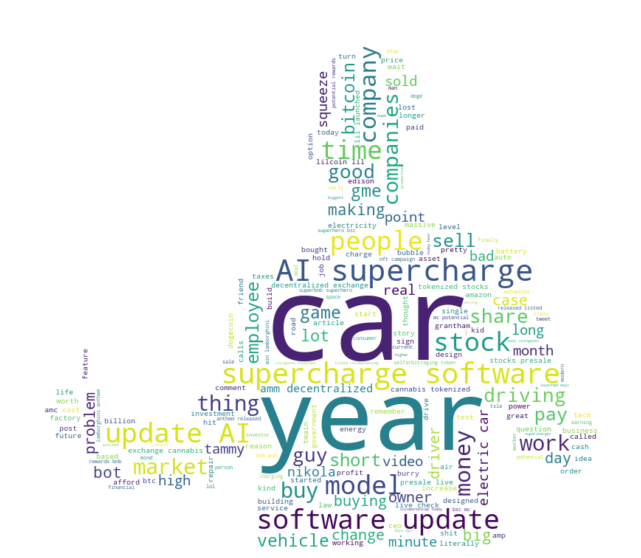

In [74]:
mask = np.array(Image.open("Elonmusk.png"))
wordcloud = WordCloud(random_state=1, background_color='white', mask=mask,  stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(20,10)),
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [79]:

# store to file
plt.savefig("elonchan.png", format="png")

<Figure size 432x288 with 0 Axes>